
## Loading our data

We will continue to use the surveys dataset that we worked with in the last
episode. Let's reopen and read in the data again:

In [3]:
import pandas as pd
surveys_df = pd.read_csv("surveys.csv")
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## Indexing and Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (column headings),
numeric ranges, or specific x,y index locations.


## Selecting data using Labels (Column Headings)

We use square brackets `[]` to select a subset of a Python object. For example,
we can select all data from a column named `species_id` from the `surveys_df`
DataFrame by name. There are two ways to do this:

In [6]:
surveys_species = surveys_df['species_id']


We can also create a new object that contains only the data within the
`species_id` column as follows:

We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.

In [10]:
surveys_df[['species_id']]

,species_id
0,NL
1,NL
2,DM
3,DM
4,DM
5,PF
6,PE
7,DM
8,DM
9,PF


Python tells us what type of error it is in the traceback, at the bottom it says
`KeyError: 'speciess'` which means that `speciess` is not a valid column name (nor a valid key in
the related Python data type dictionary).

## Extracting Range based Subsets: Slicing

> ## Reminder
> Python uses 0-based indexing.
{: .callout}

Let's remind ourselves that Python uses 0-based
indexing. This means that the first element in an object is located at position 0. This is different from other tools like R and Matlab that index elements
within objects starting at 1.

In [11]:
a = [1, 2, 3, 4, 5]


> ## Challenge - Extracting data
>
> 1. What value does the code below return?
>
>    ~~~
>    a[0]
>    ~~~
>
> 2. How about this:
>
>    ~~~
>    a[5]
>    ~~~
>
> 3. In the example above, calling `a[5]` returns an error. Why is that?
>
> 4. What about?
>
>    ~~~
>    a[len(a)]
>    ~~~


## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this:

In [12]:
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

In [17]:
surveys_df[-3:-1]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


We can also reassign values within subsets of our DataFrame.

But before we do that, let's look at the difference between the concept of
copying objects and the concept of referencing objects in Python.

## Copying Objects vs Referencing Objects in Python

Let's start with an example:

In [18]:
true_copy_surveys_df = surveys_df.copy()

In [19]:
ref_surveys_df = surveys_df 



You might think that the code `ref_surveys_df = surveys_df` creates a fresh
distinct copy of the `surveys_df` DataFrame object. However, using the `=`
operator in the simple statement `y = x` does **not** create a copy of our
DataFrame. Instead, `y = x` creates a new variable `y` that references the
**same** object that `x` refers to. To state this another way, there is only
**one** object (the DataFrame), and both `x` and `y` refer to it.

In contrast, the `copy()` method for a DataFrame creates a true copy of the
DataFrame.

Let's look at what happens when we reassign the values within a subset of the
DataFrame that references another DataFrame object:

In [21]:
ref_surveys_df[0:3] = 0
ref_surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN



Let's try the following code:

In [22]:
surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [23]:
true_copy_surveys_df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


What is the difference between these two dataframes?

When we assigned the first 3 columns the value of `0` using the
`ref_surveys_df` DataFrame, the `surveys_df` DataFrame is modified too.
Remember we created the reference `ref_survey_df` object above when we did
`ref_survey_df = surveys_df`. Remember `surveys_df` and `ref_surveys_df`
refer to the same exact DataFrame object. If either one changes the object,
the other will see the same changes to the reference object.

**To review and recap**:

- **Copy** uses the dataframe's `copy()` method

  ~~~
  true_copy_surveys_df = surveys_df.copy()
  ~~~
  {: .language-python }
- A **Reference** is created using the `=` operator

  ~~~
  ref_surveys_df = surveys_df
  ~~~

Okay, that's enough of that. Let's create a brand new clean dataframe from
the original data CSV file.



## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc` is primarily *label* based indexing. *Integers* may be used but
  they are interpreted as a *label*.
- `iloc` is primarily *integer* based indexing

To select a subset of rows **and** columns from our DataFrame, we can use the
`iloc` method. For example, we can select month, day and year (columns 2, 3
and 4 if we start counting at 1), like this:

In [32]:
surveys_df.head(10)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
1,0,0,0,0,0,0,0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [24]:

surveys_df.iloc[0:3,1:4]

,month,day,year
0,0,0,0
1,0,0,0
2,0,0,0



which gives the **output**

```
month  day  year
0      7   16  1977
1      7   16  1977
2      7   16  1977
```

Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling Python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.

Let's explore some other ways to index and select subsets of data:

In [29]:
surveys_df.loc[[0,10], :]


,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,0,0,0,0,0,0,0,0.0,0.0
10,11,7,16,1977,5,DS,F,53.0,NaN


In [30]:
surveys_df.loc[[0,10], ['species_id', 'plot_id', 'weight']]

,species_id,plot_id,weight
0,0,0,0.0
10,DS,5,NaN



We can also select a specific data value using a row and
column location within the DataFrame and `iloc` indexing:

```
dat.iloc[row, column]
```



In this `iloc` example,

In [33]:
true_copy_surveys_df.iloc[2,6]

'F'

gives the **output**

In [39]:
surveys_df = true_copy_surveys_df



Remember that Python indexing begins at 0. So, the index location [2, 6]
selects the element that is 3 rows down and 7 columns over in the DataFrame.



> ## Challenge - Range
>
> 1. What happens when you execute:
>
>    - `surveys_df[0:1]`
>    - `surveys_df[:4]`
>    - `surveys_df[:-1]`
>
> 2. What happens when you call:
>
>    - `surveys_df.iloc[0:4, 1:4]`
>    - `surveys_df.loc[0:4, 1:4]`
>
> - How are the two commands different?
{: .challenge}


## Subsetting Data using Criteria

We can also select a subset of our data using criteria. For example, we can
select all rows that have a year value of 2002:

In [40]:
surveys_df[surveys_df['year'] == 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
33320,33321,1,12,2002,1,DM,M,38.0,44.0
33321,33322,1,12,2002,1,DO,M,37.0,58.0
33322,33323,1,12,2002,1,PB,M,28.0,45.0
33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
33324,33325,1,12,2002,1,DO,M,35.0,29.0
33325,33326,1,12,2002,2,OT,F,20.0,26.0
33326,33327,1,12,2002,2,OT,M,20.0,24.0
33327,33328,1,12,2002,2,OT,F,21.0,22.0
33328,33329,1,12,2002,2,DM,M,37.0,47.0
33329,33330,1,12,2002,2,DO,M,35.0,51.0




Or we can select all rows that do not contain the year 2002:

In [43]:
pd.unique(surveys_df[surveys_df['year'] != 2002]['year'])

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001])



We can define sets of criteria too:

In [45]:
surveys_df[(surveys_df['year'] >= 1980) & (surveys_df['year'] <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
2275,2276,1,15,1980,11,DS,M,47.0,132.0
2276,2277,1,15,1980,8,PF,M,15.0,8.0
2277,2278,1,15,1980,9,OT,M,21.0,23.0
2278,2279,1,15,1980,11,DM,F,36.0,36.0
2279,2280,1,15,1980,21,OT,F,20.0,21.0




### Python Syntax Cheat Sheet

We can use the syntax below when querying data by criteria from a DataFrame.
Experiment with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`


> ## Challenge - Queries
>
> 1. Select a subset of rows in the `surveys_df` DataFrame that contain data from
>   the year 1999 and that contain weight values less than or equal to 8. How
>   many rows did you end up with? What did your neighbor get?
>
> 2. You can use the `isin` command in Python to query a DataFrame based upon a
>   list of values as follows:
>
>    ~~~
>    surveys_df[surveys_df['species_id'].isin([listGoesHere])]
>    ~~~
>    {: .language-python }
>
>   Use the `isin` function to find all plots that contain particular species
>   in the "surveys" DataFrame. How many records contain these values?
>
> 3. Experiment with other queries. Create a query that finds all rows with a
>   weight value > or equal to 0.
>
> 4. The `~` symbol in Python can be used to return the OPPOSITE of the
>   selection that you specify in Python. It is equivalent to **is not in**.
>   Write a query that selects all rows with sex NOT equal to 'M' or 'F' in
>   the "surveys" data.
{: .challenge}




In [61]:
surveys_df[(surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8)]
sum((surveys_df["year"] == 1999) & (surveys_df["weight"] <= 8))

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
29082,29083,1,16,1999,21,RM,M,16.0,8.0
29196,29197,2,20,1999,18,RM,M,18.0,8.0
29421,29422,3,15,1999,16,RM,M,15.0,8.0
29903,29904,10,10,1999,4,PP,M,20.0,7.0
29905,29906,10,10,1999,4,PP,M,21.0,4.0


In [63]:
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])]['plot_id'].unique()
surveys_df[surveys_df['species_id'].isin(['PB', 'PL'])].shape 

(2927, 9)

In [64]:
surveys_df[surveys_df["weight"] >= 0]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
67,68,8,19,1977,8,DO,F,32.0,52.0
68,69,8,19,1977,2,PF,M,15.0,8.0
69,70,8,19,1977,3,OX,F,21.0,22.0
70,71,8,19,1977,7,DM,F,36.0,35.0
73,74,8,19,1977,8,PF,M,12.0,7.0


In [65]:
surveys_df[~surveys_df["sex"].isin(['M', 'F'])]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
13,14,7,16,1977,8,DM,NaN,NaN,NaN
18,19,7,16,1977,4,PF,NaN,NaN,NaN
33,34,7,17,1977,17,DM,NaN,NaN,NaN
56,57,7,18,1977,22,DM,NaN,NaN,NaN
76,77,8,19,1977,4,SS,NaN,NaN,NaN
92,93,8,20,1977,18,DM,NaN,NaN,42.0
105,106,8,20,1977,12,NL,NaN,NaN,NaN
106,107,8,20,1977,18,NL,NaN,NaN,NaN
109,110,8,20,1977,10,DS,NaN,NaN,NaN
120,121,8,21,1977,15,NL,NaN,NaN,NaN


# Using masks to identify a specific condition

A **mask** can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in Python.

Boolean values include `True` or `False`. For example,

In [46]:
x = 5

In [48]:
x == 5

True



When we ask Python whether `x` is greater than 5, it returns `False`.
This is Python's way to say "No". Indeed, the value of `x` is 5,
and 5 is not greater than 5.

To create a boolean mask:

- Set the True / False criteria (e.g. `values > 5 = True`)
- Python will then assess each value in the object to determine whether the
  value meets the criteria (True) or not (False).
- Python creates an output object that is the same shape as the original
  object, but with a `True` or `False` value for each index location.

Let's try this out. Let's identify all locations in the survey data that have
null (missing or NaN) data values. We can use the `isnull` method to do this.
The `isnull` method will compare each cell with a null value. If an element
has a null value, it will be assigned a value of  `True` in the output object.

In [52]:
pd.isnull(surveys_df)

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,True



To select the rows where there are null values, we can use
the mask as an index to subset our data as follows:

In [54]:
surveys_df[pd.isnull(surveys_df).any(axis=1)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN




Note that the `weight` column of our DataFrame contains many `null` or `NaN`
values. We will explore ways of dealing with this in Lesson 03.

We can run `isnull` on a particular column too. What does the code below do?

In [58]:
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]['weight']



Let's take a minute to look at the statement above. We are using the Boolean
object `pd.isnull(surveys_df['weight'])` as an index to `surveys_df`. We are
asking Python to select rows that have a `NaN` value of weight.


> ## Challenge - Putting it all together
>
> 1. Create a new DataFrame that only contains observations with sex values that
>   are **not** female or male. Assign each sex value in the new DataFrame to a
>   new value of 'x'. Determine the number of null values in the subset.
>
> 2. Create a new DataFrame that contains only observations that are of sex male
>   or female and where weight values are greater than 0. Create a stacked bar
>   plot of average weight by plot with male vs female values stacked for each
>   plot.
{: .challenge}



In [66]:
new = surveys_df[~surveys_df['sex'].isin(['M', 'F'])].copy()
new['sex']='x'
print(len(new))

2511


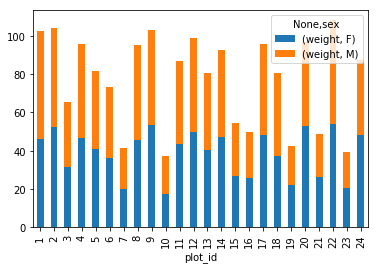

In [68]:
import matplotlib
# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
              surveys_df["weight"] > 0.][["sex", "weight", "plot_id"]]
# calculate the mean weight for each plot id and sex combination:
stack_selection = stack_selection.groupby(["plot_id", "sex"]).mean().unstack()
# and we can make a stacked bar plot from this:
stack_selection.plot(kind='bar', stacked=True)

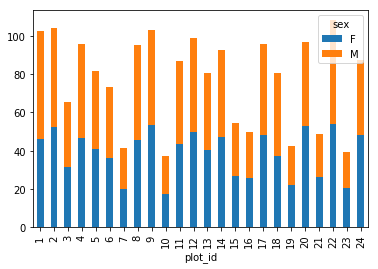

In [73]:
import matplotlib
# selection of the data with isin
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
              surveys_df["weight"] > 0.][["sex", "weight", "plot_id"]]

# calculate the mean weight for each plot id and sex combination:
stack_selection = stack_selection.groupby(["plot_id", "sex"]).mean().unstack()
# and we can make a stacked bar plot from this:
stack_selection.columns = stack_selection.columns.droplevel()

stack_selection.plot(kind='bar', stacked=True)